# Final Project - Group 10

#### Blenda Hoang, Alexander Chin, Billy Marin, Sejoon Park

### Project Proposal: Millions of people get onto flights every day. But what factors most influence whether or not they are satisfied with their flight experience or loyal to the airline? Using a dataset of over 120,000 customer reviews on elements such as food & drink, inflight entertainment, and flight distance, we intend to answer these questions.

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import os
import numpy as np

In [4]:
data = pd.read_csv('airline.csv',index_col=0, parse_dates=True,header=0)

In [5]:
df = data.copy()

### Data Description

**Column Names and Description**<br>
<br>
Gender: Gender of the passengers (Female, Male)

Customer Type: The loyalty type of the customer (Loyal customer, disloyal customer)

Age: The actual age of the passengers, in whole years 

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey, in miles 

Inflight wifi service: Satisfaction level of the inflight wifi service (1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenience (1-5)

Ease of Online booking: Satisfaction level of online booking (1-5)

Gate location: Satisfaction level of Gate location (1-5)

Food and drink: Satisfaction level of inflight Food and drink (1-5)

Online boarding: Satisfaction level of online boarding process (1-5)

Seat comfort: Satisfaction level of inflight Seat comfort (1-5)

Inflight entertainment: Satisfaction level of inflight entertainment (1-5)

On-board service: Satisfaction level of On-board service (1-5)

Leg room service: Satisfaction level of Leg room (1-5)

Baggage handling: Satisfaction level of baggage handling (1-5)

Check-in service: Satisfaction level of Check-in service (1-5)

Inflight service: Satisfaction level of inflight service (1-5)

Cleanliness: Satisfaction level of Cleanliness (1-5)

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfied, neutral or dissatisfied)

In [6]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure_Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

In [8]:
df.isna().sum()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure_Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [11]:
df.shape

(129487, 24)

In [12]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

### Data Cleaning

In [13]:
df.drop(columns='id',inplace=True)

In [14]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [15]:
df.replace(to_replace='Male',value=1,inplace=True)
df.replace(to_replace='Female',value=0,inplace=True)

In [16]:
df.replace(to_replace='Loyal Customer',value=1,inplace=True)
df.replace(to_replace='disloyal Customer',value=0,inplace=True)

In [17]:
df.replace(to_replace='Business travel',value=1,inplace=True)
df.replace(to_replace='Personal Travel',value=0,inplace=True)

In [18]:
df.replace(to_replace='satisfied',value=1,inplace=True)
df.replace(to_replace='neutral or dissatisfied',value=0,inplace=True)

In [19]:
df.rename(columns=\
        {'Gender':'Male','Customer_Type':'Loyal_Customer','Type_of_Travel':'Business_travel','satisfaction':'Satisfied'},inplace=True)

In [20]:
df = pd.get_dummies(df, columns=['Class'], dummy_na=True)

In [21]:
df.head()

,Male,Loyal_Customer,Age,Business_travel,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfied,Class_Business,Class_Eco,Class_Eco Plus,Class_nan
0,0,1,52,1,160,5,4,3,4,3,...,2,5,5,50,44.0,1,0,1,0,0
1,0,1,36,1,2863,1,1,3,1,5,...,3,4,5,0,0.0,1,1,0,0,0
2,1,0,20,1,192,2,0,2,4,2,...,2,2,2,0,0.0,0,0,1,0,0
3,1,1,44,1,3377,0,0,0,2,3,...,3,1,4,0,6.0,1,1,0,0,0
4,0,1,49,1,1182,2,3,4,3,4,...,4,2,4,0,20.0,1,0,1,0,0


In [22]:
df.drop(columns='Class_nan',inplace=True)

In [23]:
df.head()

,Male,Loyal_Customer,Age,Business_travel,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfied,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,52,1,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0,1,0
1,0,1,36,1,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,1,0,0
2,1,0,20,1,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,0,1,0
3,1,1,44,1,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,1,0,0
4,0,1,49,1,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,0,1,0


In [24]:
dfS = df.copy()

In [25]:
dfL = df.copy()

### Exploratory Data Analysis

##### Feature Engineering

In [26]:
df2 = df.copy()

In [27]:
df2['discretized_age_EW']=pd.cut(df2.Age, 5)
df2['discretized_age_EF']=pd.qcut(df2.Age, 5)

In [28]:
df2['Departure_Delay_EW']=pd.cut(df2.Departure_Delay_in_Minutes, bins=[-1,30,60,90,120,1000])

In [29]:
df2['Arrival_Delay_EW']=pd.cut(df2.Arrival_Delay_in_Minutes, bins=[-1,30,60,90,120,1000])

In [30]:
conditions = [
    ((df2['Departure_Delay_in_Minutes'] > 0) & (df2['Arrival_Delay_in_Minutes'] > 0)),
    ((df2['Departure_Delay_in_Minutes'] != 0) & (df2['Arrival_Delay_in_Minutes'] == 0)),
    ((df2['Departure_Delay_in_Minutes'] == 0) & (df2['Arrival_Delay_in_Minutes'] != 0)),
    ((df2['Departure_Delay_in_Minutes'] == 0) & (df2['Arrival_Delay_in_Minutes'] == 0))]

values = [1,0.5,0.5,0]

In [31]:
df2['Travel_Delays'] = np.select(conditions, values)

##### Count of satisfied customers by flight class

<AxesSubplot:xlabel='Satisfied', ylabel='count'>

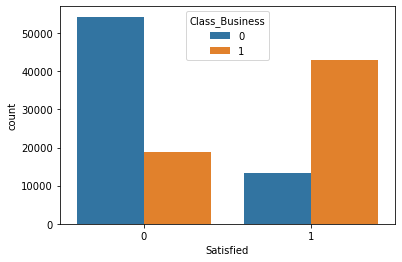

In [32]:
sns.countplot(x='Satisfied', hue="Class_Business", data=df)

The company has overall more unsatisfied customers but of those customers who are satisfied, there is a larger concentration in those flying business class.

#### Pie Chart of Satisfaction Category by Flight Class

<AxesSubplot:ylabel='Class'>

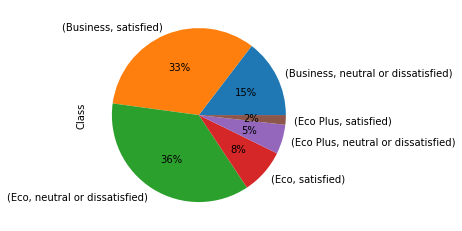

In [33]:
data.groupby(['Class','satisfaction'])['Class'].count().plot(kind='pie', autopct='%1.0f%%')

##### Count of Loyal or Disloyal Customers

<AxesSubplot:xlabel='Loyal_Customer', ylabel='count'>

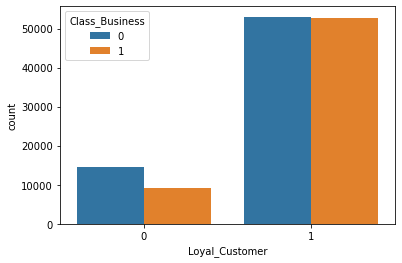

In [34]:
sns.countplot(x='Loyal_Customer',hue="Class_Business", data=df2)

#### Rating of Inflight Wifi Service by Satisfaction Category


<AxesSubplot:xlabel='Inflight_wifi_service', ylabel='count'>

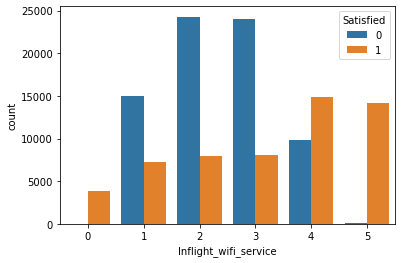

In [35]:
sns.countplot(x = 'Inflight_wifi_service', hue = 'Satisfied', data = df)

#### Rating of Ease of Online Booking by Satisfaction Category

<AxesSubplot:xlabel='Online_boarding', ylabel='count'>

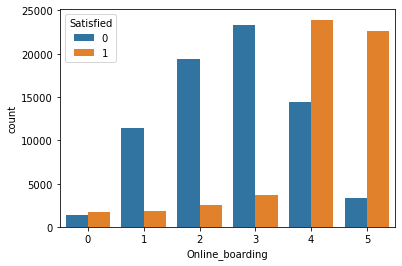

In [36]:
sns.countplot(x = 'Online_boarding', hue = 'Satisfied', data = df)

Despite having a greater proportion of unsatisfied customers, this airline has a greater proportion of loyal customers. Loyal customers also observe a higher proportion of business class fliers.

#### Departure & Arrival Delays

In [37]:
df2.groupby(['Arrival_Delay_EW','Travel_Delays','Satisfied']).agg({'Satisfied':'count'}).rename(columns=\
        {'Satisfied':'Count'})

Count
Arrival_Delay_EW Travel_Delays Satisfied       
(-1, 30]         0.0           0          31345
                               1          28006
                 0.5           0          14704
                               1          11892
                 1.0           0          15382
                               1           9783
(30, 60]         0.0           0              0
                               1              0
                 0.5           0            382
                               1            203
                 1.0           0           5557
                               1           3145
(60, 90]         0.0           0              0
                               1              0
                 0.5           0             40
                               1             19
                 1.0           0           2461
                               1           1342
(90, 120]        0.0           0              0
                               1              0
                 0.5           0             15
                               1              4
                 1.0           0           1299
                               1            716
(120, 1000]      0.0           0              0
                               1              0
                 0.5           0              1
                               1              0
                 1.0           0           2037
                               1           1150

In [38]:
Arrival_Satisfaction = df2.groupby(['Arrival_Delay_EW','Travel_Delays','Satisfied']).agg({'Satisfied':'count'}).rename(columns=\
        {'Satisfied':'Count'})

Arrival_Satisfaction_Perc = Arrival_Satisfaction.groupby(['Arrival_Delay_EW','Travel_Delays'],level=0).apply(lambda x:
                                                 (x*100) / x.sum()).rename(columns={'Count':'%'})

Arrival_Satisfaction_Perc

%
Arrival_Delay_EW Travel_Delays Satisfied            
(-1, 30]         0.0           0           52.812926
                               1           47.187074
                 0.5           0           55.286509
                               1           44.713491
                 1.0           0           61.124578
                               1           38.875422
(30, 60]         0.0           0                 NaN
                               1                 NaN
                 0.5           0           65.299145
                               1           34.700855
                 1.0           0           63.858883
                               1           36.141117
(60, 90]         0.0           0                 NaN
                               1                 NaN
                 0.5           0           67.796610
                               1           32.203390
                 1.0           0           64.712069
                               1           35.287931
(90, 120]        0.0           0                 NaN
                               1                 NaN
                 0.5           0           78.947368
                               1           21.052632
                 1.0           0           64.466501
                               1           35.533499
(120, 1000]      0.0           0                 NaN
                               1                 NaN
                 0.5           0          100.000000
                               1            0.000000
                 1.0           0           63.915908
                               1           36.084092

After 30 minutes, even if a plane departs on time but arrives late due to extentuating circumstances or departs late and still is able to arrive on time, the proportion of unsatisfied customers is the same as customers to who were late on both departure and arrival. Additionally, after 30 minutes, the proportion of satisfied vs unsatisfied customers remain the same even with lengthier delays.

#### Average Rating of Flight Experience

In [39]:
df2.groupby('Satisfied')[['Inflight_wifi_service','Seat_comfort','Food_and_drink','Inflight_entertainment','On-board_service',\
           'Leg_room_service','Inflight_service','Cleanliness']].mean()

,Inflight_wifi_service,Seat_comfort,Food_and_drink,Inflight_entertainment,On-board_service,Leg_room_service,Inflight_service,Cleanliness
Satisfied,,,,,,,,
0,2.398470,3.038525,2.958525,2.892236,3.019570,2.990495,3.389662,2.932851
1,3.158135,3.966176,3.525061,3.964345,3.856475,3.820376,3.971277,3.746134


#### Average Rating of Pre-Flight Experience

In [40]:
df2.groupby('Satisfied')[['Departure_Arrival_time_convenient','Ease_of_Online_booking',\
                         'Gate_location','Online_boarding','Baggage_handling','Checkin_service']].mean()

,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Online_boarding,Baggage_handling,Checkin_service
Satisfied,,,,,,
0,3.130229,2.549512,2.980184,2.658846,3.374681,3.043045
1,2.962497,3.026554,2.972646,4.025648,3.966638,3.648786


#### Drill down table of Class, Customer Type, Type of Travel, and Satisfaction Category

In [41]:
data.groupby(['Class','Customer_Type','Type_of_Travel','satisfaction']).\
    agg({'Class':'count','Online_boarding':'mean','Inflight_wifi_service':'mean',\
         'Cleanliness':'mean','Flight_Distance':'mean'})

Class  \
Class    Customer_Type     Type_of_Travel  satisfaction                     
Business Loyal Customer    Business travel neutral or dissatisfied  11078   
                                           satisfied                39191   
                           Personal Travel neutral or dissatisfied   2347   
                                           satisfied                  313   
         disloyal Customer Business travel neutral or dissatisfied   5556   
                                           satisfied                 3662   
                           Personal Travel neutral or dissatisfied     13   
Eco      Loyal Customer    Business travel neutral or dissatisfied   6209   
                                           satisfied                 5645   
                           Personal Travel neutral or dissatisfied  29488   
                                           satisfied                 3333   
         disloyal Customer Business travel neutral or dissatisfied  11517   
                                           satisfied                 1933   
                           Personal Travel neutral or dissatisfied    152   
                                           satisfied                   32   
Eco Plus Loyal Customer    Business travel neutral or dissatisfied   2139   
                                           satisfied                 1852   
                           Personal Travel neutral or dissatisfied   4111   
                                           satisfied                  394   
         disloyal Customer Business travel neutral or dissatisfied    838   
                                           satisfied                   73   
                           Personal Travel neutral or dissatisfied      4   

                                                                    Online_boarding  \
Class    Customer_Type     Type_of_Travel  satisfaction                               
Business Loyal Customer    Business travel neutral or dissatisfied         2.872811   
                                           satisfied                       4.180858   
                           Personal Travel neutral or dissatisfied         3.184917   
                                           satisfied                       3.686901   
         disloyal Customer Business travel neutral or dissatisfied         2.425126   
                                           satisfied                       3.648553   
                           Personal Travel neutral or dissatisfied         2.615385   
Eco      Loyal Customer    Business travel neutral or dissatisfied         2.626671   
                                           satisfied                       3.814526   
                           Personal Travel neutral or dissatisfied         2.687771   
                                           satisfied                       3.493549   
         disloyal Customer Business travel neutral or dissatisfied         2.427281   
                                           satisfied                       3.602690   
                           Personal Travel neutral or dissatisfied         2.236842   
                                           satisfied                       3.718750   
Eco Plus Loyal Customer    Business travel neutral or dissatisfied         2.550725   
                                           satisfied                       3.733261   
                           Personal Travel neutral or dissatisfied         2.705181   
                                           satisfied                       3.535533   
         disloyal Customer Business travel neutral or dissatisfied         2.416468   
                                           satisfied                       3.246575   
                           Personal Travel neutral or dissatisfied         2.500000   

                                                                    Inflight_wifi_service  \
Class    Customer_Type     Type_of_Tr

### Clustering

Our initial analysis was to run a KMeans cluster to understand the various customer segments. We ran a GridSearchCV to determine the optimal hyperparameter, n_clusters, which turned out to be 4. We limited the range of clusters in our GridSearchCV since it is harder to distinguish patterns when the segments are too diluted.

In [42]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
X = df.drop('Satisfied',axis=1)
y = df.Satisfied

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, random_state=0,test_size = 0.2)

In [44]:
pipeline = Pipeline([
    ("kmeans", KMeans(random_state=0))
])

In [45]:
param_grid = dict(kmeans__n_clusters=range(2, 5))
grid_clf = GridSearchCV(pipeline, param_grid, cv=5, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.6s
[CV] END ...............................kmeans__n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kmeans', KMeans(random_state=0))]),
             param_grid={'kmeans__n_clusters': range(2, 5)}, verbose=2)

In [46]:
grid_clf.best_params_

{'kmeans__n_clusters': 4}

In [47]:
clu = KMeans(n_clusters=4, random_state=0)

In [48]:
clu.fit(df)
clu.labels_

KMeans(n_clusters=4, random_state=0)

array([2, 1, 2, ..., 3, 0, 3], dtype=int32)

In [49]:
df['cluster']=clu.labels_

In [50]:
df.groupby('cluster').mean()

,Male,Loyal_Customer,Age,Business_travel,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfied,Class_Business,Class_Eco,Class_Eco Plus
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.493945,0.767803,37.573967,0.636487,1124.338322,2.741051,3.152736,2.756754,2.956012,3.182817,...,3.617307,3.311924,3.650983,3.253027,15.409829,15.625821,0.373825,0.389382,0.529861,0.080758
1,0.497670,0.997188,43.509883,0.991644,3407.981279,2.735979,2.930982,2.916680,2.994135,3.386389,...,3.793749,3.483288,3.795115,3.560903,14.772136,15.130805,0.772296,0.989394,0.008838,0.001768
2,0.490208,0.758414,38.824941,0.608385,410.970476,2.717229,3.048862,2.683457,2.978070,3.149013,...,3.575974,3.226315,3.581895,3.190461,14.350348,15.023078,0.331863,0.314542,0.588981,0.096477
3,0.494217,0.951699,41.641560,0.831737,2190.667721,2.736355,3.005512,2.868923,2.996069,3.289400,...,3.717242,3.418128,3.709877,3.446458,14.202828,14.436291,0.620324,0.780905,0.185885,0.033210


<div class="alert alert-block alert-info"> <u>Conclusion:</u> 
<br>
Customer Type A (Cluster 1 & 3): Loyal, satisfied customers who on average fly longer distances and fly business class.
<br> 
Customer Type B (Cluster 0 & 2): Disloyal, unsatisfied customers who on average fly shorter distances and tend to fly economy or economy plus.

### Decision Tree

Since satisfaction was one of the distinguishing attributes between customers, we ran a decision tree with the target variable as 'Satisfaction' to understand what aspects of the customer's flight journey most impact their overall happiness with the experience. We also used GridSearchCV to tune the hyperparameter, max_depth, however we employed early stoppage to ensure we would be able to interpret the DT appropriately. This still produced a fairly decent test score of 0.88.

In [51]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [52]:
X = df.drop('Satisfied',axis=1)
y = df.Satisfied

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, random_state=0,test_size = 0.2)

In [54]:
df_feature_names = X.columns.tolist()
df_target_names = [str(s) for s in y.unique()]

#### Decision Tree Parameter Tuning

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 5)}, return_train_score=True)

<AxesSubplot:xlabel='param_max_depth'>

<AxesSubplot:xlabel='param_max_depth'>

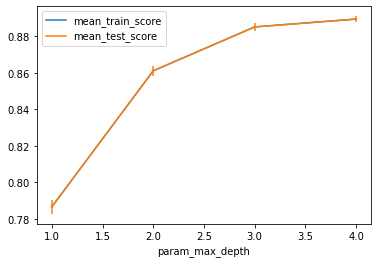

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 5)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [56]:
grid.best_params_
grid.score(X_test, y_test)

{'max_depth': 4}

0.8849718124951734

In [57]:
tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

0.8817283187890956

<Figure size 3000x900 with 0 Axes>

'no_pruning.png'

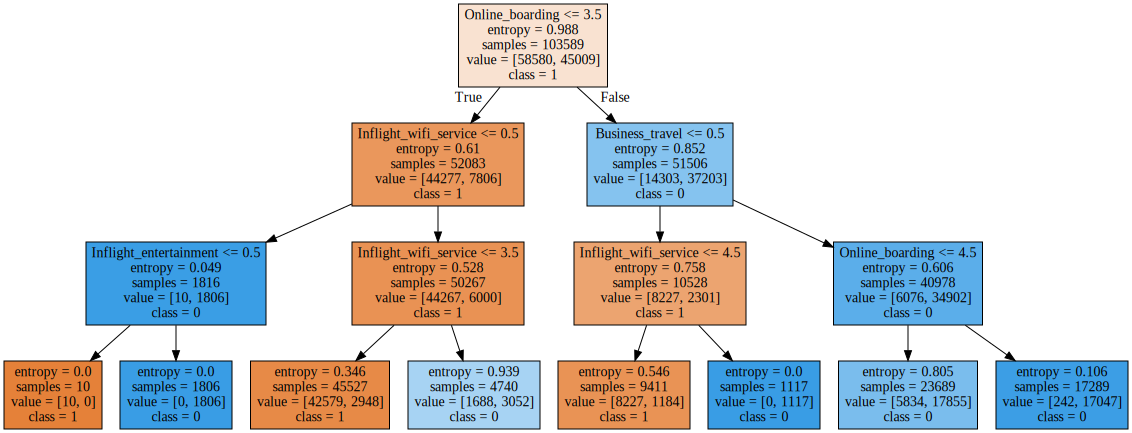

<Figure size 3000x900 with 0 Axes>

In [58]:
from sklearn.tree import plot_tree
import graphviz
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = export_graphviz(tree, out_file=None, feature_names=df_feature_names,class_names= df_target_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="no_pruning", cleanup=True)
graph

In [59]:
d = {'Feature_Name':df_feature_names,'Feature_Weights':tree.feature_importances_.tolist()}

In [60]:
important_features = pd.DataFrame(d)
important_features.sort_values(by='Feature_Weights',ascending=False).nlargest(5,columns='Feature_Weights')

,Feature_Name,Feature_Weights
10,Online_boarding,0.545214
5,Inflight_wifi_service,0.254949
3,Business_travel,0.198241
12,Inflight_entertainment,0.001596
14,Leg_room_service,0.000000


<div class="alert alert-block alert-info"> <u>Conclusion:</u> Based off our decision tree feature weights, we can observe the most important features as the online boarding experience, the inflight wifi service, whether a customer traveled business class or not, and the cleanliness of the airplane. 
    
<br>
<br>
<u>Recommendation:</u> Our recommendation is for the airline to take steps to try and improve the customer online boarding experience whether it be through improving the user interface or making the process more seamless. Other opportunities would be to improve the wifi performance or the cost of wifi on planes and maintain interesting inflight entertainment options. Without fully changing the customer cabin, the airline could observe features of business class that could be applied to economy such as premium snacks or better entertainment offerings.


### Loyalty


Loyalty was another distinguishing attributes between customers, hence we ran a logistic regression with the target variable as 'Loyalty' to understand what the effect of each component on the overall likelihood of whether a customer would be loyal or not. Prior to running the logistic regression, we balanced the dataset since there was a significantly greater proportion of loyal customers than disloyal customers. We also used GridSearchCV to tune the hyperparameters, C and penalty (L1/L2) to find the optimal model.

##### Balance the dataset

In [61]:
df.head()

,Male,Loyal_Customer,Age,Business_travel,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfied,Class_Business,Class_Eco,Class_Eco Plus,cluster
0,0,1,52,1,160,5,4,3,4,3,...,2,5,5,50,44.0,1,0,1,0,2
1,0,1,36,1,2863,1,1,3,1,5,...,3,4,5,0,0.0,1,1,0,0,1
2,1,0,20,1,192,2,0,2,4,2,...,2,2,2,0,0.0,0,0,1,0,2
3,1,1,44,1,3377,0,0,0,2,3,...,3,1,4,0,6.0,1,1,0,0,1
4,0,1,49,1,1182,2,3,4,3,4,...,4,2,4,0,20.0,1,0,1,0,0


In [62]:
loyal_raw = df[df.Loyal_Customer == 1]
len(loyal_raw)

105773

In [63]:
disloyal_raw = df[df.Loyal_Customer == 0]
len(disloyal_raw)

23714

In [64]:
percentage = len(disloyal_raw)/float(len(loyal_raw))
percentage

0.22419710133966134

In [65]:
loyal = loyal_raw.sample(frac = percentage, random_state = 1)

In [66]:
len(loyal)
len(disloyal_raw)

23714

23714

In [67]:
df = disloyal_raw.append(loyal)

In [68]:
df.Loyal_Customer.value_counts()

0    23714
1    23714
Name: Loyal_Customer, dtype: int64

##### Logistic Regression on Target Variable 'Loyal_Customer'

In [69]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

%matplotlib inline

preprocessor = make_pipeline(StandardScaler(), SimpleImputer())

pipe_lr = Pipeline([('preprocessing', preprocessor),\
                    ('classifier', LogisticRegression(random_state = 0, multi_class = 'auto'))])

In [70]:
X = df.drop(['Loyal_Customer','cluster'],axis=1)
y = df.Loyal_Customer

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, random_state=0,test_size = 0.2)

In [72]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('simpleimputer', SimpleImputer())])),
  ('classifier', LogisticRegression(random_state=0))],
 'verbose': False,
 'preprocessing': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('simpleimputer', SimpleImputer())]),
 'classifier': LogisticRegression(random_state=0),
 'preprocessing__memory': None,
 'preprocessing__steps': [('standardscaler', StandardScaler()),
  ('simpleimputer', SimpleImputer())],
 'preprocessing__verbose': False,
 'preprocessing__standardscaler': StandardScaler(),
 'preprocessing__simpleimputer': SimpleImputer(),
 'preprocessing__standardscaler__copy': True,
 'preprocessing__standardscaler__with_mean': True,
 'preprocessing__standardscaler__with_std': True,
 'preprocessing__simpleimputer__add_indicator': False,
 'preprocessing__simpleimputer__copy': True,
 'preprocessing__simpleimputer__fill_value': None,
 'preprocessing__s

In [73]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto',
                                        random_state=0, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

grid.best_params_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1.0, 10],
                         'logisticregression__penalty': ['l2', 'l1']},
             return_train_score=True)

{'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'}

In [74]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.259557,0.024688,0.014779,0.002964,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.892789,0.885902,0.887088,0.888593,0.003007,3,0.887365,0.889899,0.889464,0.888909,0.001107
1,0.038500,0.004400,0.000000,0.000000,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
2,0.364159,0.023776,0.004611,0.000933,1.0,l2,"{'logisticregression__C': 1.0, 'logisticregres...",0.893580,0.886930,0.887879,0.889463,0.002937,1,0.887088,0.891046,0.890097,0.889410,0.001687
3,0.033473,0.006439,0.000000,0.000000,1.0,l1,"{'logisticregression__C': 1.0, 'logisticregres...",NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
4,0.409796,0.009373,0.005361,0.002998,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.893106,0.886613,0.887879,0.889199,0.002810,2,0.887562,0.890888,0.890295,0.889581,0.001448
5,0.031066,0.009254,0.000000,0.000000,10,l1,"{'logisticregression__C': 10, 'logisticregress...",NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN


In [75]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_logisticregression__C', columns='param_logisticregression__penalty')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))
res

param_logisticregression__penalty,l2
0.1,0.889
1.0,0.889
10.0,0.889


In [76]:
accuracy = grid.score(X_test, y_test)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

Best cross-validation score: 0.889
Accuracy score of the GridSearchCV is 0.890


In [77]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=5000, random_state=0))])


In [78]:
print("Logistic regression coefficients:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic regression coefficients:
[[ 0.16534576  5.67114877 -6.78363891  5.64727168 -2.61292019  1.1204477
  -0.46981613  0.36521563 -0.86013103  2.54153315  0.6922733   2.28582828
  -0.50418023  0.14497602 -1.21610858 -0.94607428 -1.17665027 -1.77369841
  -0.52596544  0.74819613  2.11695707 -0.01174817 -0.80668752  0.75601913]]


In [79]:
print("Logistic regression feature names:\n{}".format(
      X.columns.tolist()))

Logistic regression feature names:
['Male', 'Age', 'Business_travel', 'Flight_Distance', 'Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Satisfied', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']


In [80]:
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Test set score: 0.89


<div class="alert alert-block alert-info"> <u>Conclusion:</u><br>
A few examples of interpreting our logistic regression coefficients are as such:<br> 

-If a customer is traveling in Economy Plus, the odds that the customer is Loyal is .746 times more likely than the odds that the customer is not Loyal when all other variables are held constant.<br>
    
-If a customer is Satisfied, the odds that the customer is Loyal is 2.11 times more likely than the odds that the customer is not Loyal when all other variables are held constant.<br>

-If the departure/arrival time is convenient, the odds that the customer is Loyal is 1.12 times more likely than the odds that the customer is not Loyal when all other variables are held constant.<br>

    
<br>
<br>
<u>Recommendation:</u> Our recommendation is for the airline to take steps to try and improve the overall customer satisfaction to help them convert as loyal customers. Also, improving sales on Economy Plus tickets or optimizing flight times for customer convenience (such as aligning to hotel check-in times, etc.) may also help improve customer loyalty.


### Data preprocessing

In [81]:
X = dfS.drop('Satisfied',axis=1)
y = dfS.Satisfied

In [82]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, random_state=0,test_size = 0.2)

In [83]:
preprocessor = make_pipeline(StandardScaler(), SimpleImputer())

## Best ML Model to Predict Target Variable 'Satisfaction'

### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [86]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [87]:
rf.score(X_test, y_test)

0.9611939145879991

In [88]:
np.set_printoptions(precision=4, suppress=True)
param_grid = {'max_features': [2,4,6,8,10,12,14,16],
              'max_depth': [2,4,6,8,10,12,14,16],
              'n_estimators':[10,50,100,200,500]}
param_grid

{'max_features': [2, 4, 6, 8, 10, 12, 14, 16],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
 'n_estimators': [10, 50, 100, 200, 500]}

In [89]:
grid = GridSearchCV(rf, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
                         'max_features': [2, 4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [10, 50, 100, 200, 500]},
             return_train_score=True, scoring='roc_auc')

In [90]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.285,0.011,0.032,0.005,2,2,10,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.917,0.916,...,0.917,3.279e-03,320,0.917,0.913,0.922,0.918,0.916,0.917,3.026e-03
1,0.955,0.042,0.072,0.008,2,2,50,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.935,0.931,...,0.930,6.267e-03,314,0.934,0.931,0.932,0.919,0.935,0.930,6.059e-03
2,1.829,0.045,0.131,0.008,2,2,100,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.940,0.936,...,0.936,2.331e-03,309,0.940,0.935,0.935,0.934,0.936,0.936,1.949e-03
3,4.013,0.167,0.272,0.016,2,2,200,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.938,0.940,...,0.936,2.874e-03,308,0.937,0.938,0.934,0.938,0.934,0.936,1.791e-03
4,9.789,0.108,0.677,0.059,2,2,500,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.936,0.937,...,0.935,1.674e-03,310,0.935,0.936,0.937,0.934,0.935,0.935,1.114e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2.550,0.051,0.034,0.005,16,16,10,"{'max_depth': 16, 'max_features': 16, 'n_estim...",0.992,0.994,...,0.993,6.556e-04,73,0.999,0.999,0.999,0.999,0.999,0.999,3.973e-05
316,12.618,0.053,0.172,0.023,16,16,50,"{'max_depth': 16, 'max_features': 16, 'n_estim...",0.994,0.995,...,0.994,2.995e-04,15,0.999,0.999,0.999,0.999,0.999,0.999,2.643e-05
317,25.418,0.183,0.291,0.017,16,16,100,"{'max_depth': 16, 'max_features': 16, 'n_estim...",0.994,0.995,...,0.994,2.752e-04,9,0.999,0.999,0.999,0.999,0.999,0.999,3.040e-05
318,51.556,0.188,0.736,0.181,16,16,200,"{'max_depth': 16, 'max_features': 16, 'n_estim...",0.994,0.995,...,0.994,3.346e-04,6,0.999,0.999,0.999,0.999,0.999,0.999,2.626e-05


In [91]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_max_depth', columns='param_max_features')
pd.set_option("display.precision",6)
res = res.set_index(res.index.values.round(6))
res

param_max_features,2,4,6,8,10,12,14,16
2,0.930889,0.936188,0.938602,0.938837,0.939596,0.937638,0.936248,0.935680
4,0.953693,0.964419,0.968181,0.969709,0.969776,0.969937,0.970359,0.969768
6,0.969392,0.976854,0.980079,0.981426,0.982157,0.982434,0.982551,0.982539
8,0.978095,0.984474,0.986929,0.987946,0.988516,0.988772,0.988818,0.988807
10,0.983730,0.988851,0.990443,0.991244,0.991628,0.991805,0.991898,0.991926
12,0.987162,0.991014,0.992282,0.992944,0.993190,0.993260,0.993315,0.993291
14,0.988960,0.992127,0.993238,0.993676,0.993821,0.993905,0.993878,0.993848
16,0.989977,0.992762,0.993679,0.993991,0.994110,0.994178,0.994165,0.994157


<AxesSubplot:xlabel='param_max_features'>

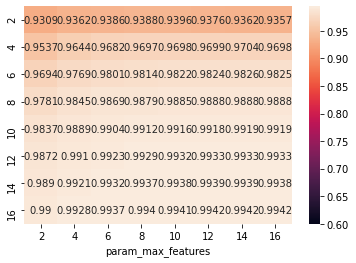

In [92]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".4g", vmin=0.6)

In [93]:
grid.best_params_

{'max_depth': 16, 'max_features': 12, 'n_estimators': 500}

In [94]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
RandomForestClassifier(max_depth=16, max_features=12, n_estimators=500)


In [95]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.6f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.994316


In [96]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.9943170694862994

### Gradient Booster Classifier

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier().fit(X_train, y_train)

In [98]:
gbrt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [99]:
gbrt.score(X_test, y_test)

0.9408834659047031

In [100]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'learning_rate': np.logspace(-2, 2, 5),
              'n_estimators': [5,10,50,100,200,500]}
param_grid

{'learning_rate': array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ]),
 'n_estimators': [5, 10, 50, 100, 200, 500]}

In [101]:
grid = GridSearchCV(gbrt, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ]),
                         'n_estimators': [5, 10, 50, 100, 200, 500]},
             return_train_score=True, scoring='roc_auc')

In [102]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.944841,0.040255,0.021303,0.008348,0.01,5,"{'learning_rate': 0.01, 'n_estimators': 5}",0.923389,0.922755,0.922248,...,0.923256,0.000954,17,0.923226,0.923382,0.923507,0.922814,0.923354,0.923257,0.000239
1,1.712175,0.052695,0.021894,0.006786,0.01,10,"{'learning_rate': 0.01, 'n_estimators': 10}",0.923389,0.922755,0.922248,...,0.923256,0.000954,17,0.923226,0.923382,0.923507,0.922814,0.923354,0.923257,0.000239
2,7.581587,0.049408,0.029052,0.002306,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",0.955606,0.936450,0.936976,...,0.944465,0.009761,15,0.955324,0.937817,0.937678,0.955581,0.936952,0.944670,0.008809
3,14.975416,0.062282,0.062261,0.010218,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.966860,0.966152,0.966879,...,0.966980,0.000583,13,0.967041,0.967182,0.967116,0.966788,0.966984,0.967022,0.000135
4,29.699365,0.132168,0.095705,0.005694,0.01,200,"{'learning_rate': 0.01, 'n_estimators': 200}",0.973991,0.973688,0.973704,...,0.973957,0.000491,12,0.974534,0.973785,0.974094,0.974247,0.973482,0.974028,0.000365
5,74.963134,0.091329,0.226500,0.015026,0.01,500,"{'learning_rate': 0.01, 'n_estimators': 500}",0.982753,0.983590,0.984086,...,0.983592,0.000451,10,0.983943,0.983594,0.983558,0.983701,0.983684,0.983696,0.000135
6,0.803741,0.048107,0.011084,0.003283,0.1,5,"{'learning_rate': 0.1, 'n_estimators': 5}",0.936580,0.933946,0.934501,...,0.935171,0.001231,16,0.936086,0.935204,0.935335,0.934504,0.935160,0.935258,0.000505
7,1.538474,0.021470,0.012901,0.002989,0.1,10,"{'learning_rate': 0.1, 'n_estimators': 10}",0.966645,0.965714,0.966516,...,0.966590,0.000567,14,0.966859,0.966731,0.966835,0.966247,0.966529,0.966640,0.000229
8,7.765755,0.201869,0.043811,0.013022,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.982627,0.983854,0.983975,...,0.983624,0.000507,9,0.983813,0.983704,0.983620,0.983718,0.983787,0.983728,0.000068
9,14.759674,0.053946,0.048814,0.004727,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.987117,0.988377,0.988402,...,0.987944,0.000514,7,0.988532,0.988064,0.987946,0.987818,0.988273,0.988127,0.000252


In [103]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_learning_rate', columns='param_n_estimators')
pd.set_option("display.precision",6)
res = res.set_index(res.index.values.round(6))
res

param_n_estimators,5,10,50,100,200,500
0.01,0.923256,0.923256,0.944465,0.966980,0.973957,0.983592
0.10,0.935171,0.966590,0.983624,0.987944,0.991422,0.993520
1.00,0.976552,0.984176,0.992346,0.993332,0.993385,0.992657
10.00,0.212802,0.212802,0.212802,0.212802,0.212802,0.212802
100.00,0.181664,0.181664,0.181664,0.181664,0.181664,0.181664


<AxesSubplot:xlabel='param_n_estimators'>

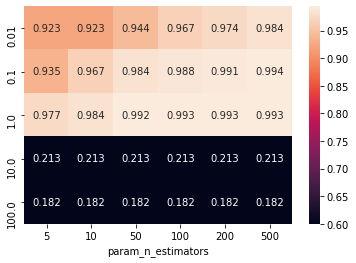

In [104]:
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

In [105]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [106]:
print("Best estimator:\n{}".format(grid.best_estimator_))
print("Best n_estimators:\n{}".format(grid.best_estimator_.n_estimators))

Best estimator:
GradientBoostingClassifier(n_estimators=500)
Best n_estimators:
500


In [107]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.6f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.992751


In [108]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.9927531422370671

### XGBoost

In [109]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("accuracy on training set: %f" % xgb.score(X_train, y_train))
print("accuracy on test set: %f" % xgb.score(X_test, y_test))

[03:11:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

accuracy on training set: 0.975663
accuracy on test set: 0.961541


In [110]:
from sklearn.metrics import roc_auc_score
y_proba_xgb = xgb.fit(X_train, y_train).predict_proba(X_test)

y_score_xgb = xgb.predict_proba(X_test)
roc_auc_score(y_test, y_proba_xgb[:,1])

[03:11:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9947177122404324

### LightGBM

In [111]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print("accuracy on training set: %f" % lgbm.score(X_train, y_train))
print("accuracy on test set: %f" % lgbm.score(X_test, y_test))

LGBMClassifier()

accuracy on training set: 0.966377
accuracy on test set: 0.962661


In [112]:
from sklearn.metrics import roc_auc_score
y_proba_lgbm = lgbm.fit(X_train, y_train).predict_proba(X_test)

y_score_lgbm = lgbm.predict_proba(X_test)
roc_auc_score(y_test, y_proba_lgbm[:,1])

0.9946478822217342

### CatBoost

In [113]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
catb.fit(X_train, y_train)
print("accuracy on training set: %f" % catb.score(X_train, y_train))
print("accuracy on test set: %f" % catb.score(X_test, y_test))

Learning rate set to 0.074726
0:	learn: 0.5938714	total: 80.7ms	remaining: 1m 20s
1:	learn: 0.5155943	total: 87.3ms	remaining: 43.5s
2:	learn: 0.4285726	total: 93ms	remaining: 30.9s
3:	learn: 0.3830403	total: 100ms	remaining: 24.9s
4:	learn: 0.3501797	total: 108ms	remaining: 21.6s
5:	learn: 0.3236726	total: 117ms	remaining: 19.3s
6:	learn: 0.2906647	total: 125ms	remaining: 17.7s
7:	learn: 0.2744833	total: 133ms	remaining: 16.5s
8:	learn: 0.2547045	total: 142ms	remaining: 15.6s
9:	learn: 0.2404286	total: 150ms	remaining: 14.9s
10:	learn: 0.2301863	total: 159ms	remaining: 14.3s
11:	learn: 0.2159679	total: 167ms	remaining: 13.8s
12:	learn: 0.2075595	total: 176ms	remaining: 13.4s
13:	learn: 0.2006255	total: 183ms	remaining: 12.9s
14:	learn: 0.1931934	total: 193ms	remaining: 12.7s
15:	learn: 0.1855595	total: 202ms	remaining: 12.4s
16:	learn: 0.1821414	total: 210ms	remaining: 12.1s
17:	learn: 0.1784996	total: 218ms	remaining: 11.9s
18:	learn: 0.1730851	total: 227ms	remaining: 11.7s
19:	learn

163:	learn: 0.0903973	total: 1.41s	remaining: 7.17s
164:	learn: 0.0902907	total: 1.41s	remaining: 7.16s
165:	learn: 0.0900861	total: 1.42s	remaining: 7.15s
166:	learn: 0.0899842	total: 1.43s	remaining: 7.13s
167:	learn: 0.0899260	total: 1.44s	remaining: 7.12s
168:	learn: 0.0896862	total: 1.45s	remaining: 7.11s
169:	learn: 0.0896252	total: 1.45s	remaining: 7.1s
170:	learn: 0.0895570	total: 1.46s	remaining: 7.09s
171:	learn: 0.0895229	total: 1.47s	remaining: 7.08s
172:	learn: 0.0895007	total: 1.48s	remaining: 7.07s
173:	learn: 0.0894251	total: 1.49s	remaining: 7.06s
174:	learn: 0.0892943	total: 1.49s	remaining: 7.05s
175:	learn: 0.0891931	total: 1.5s	remaining: 7.03s
176:	learn: 0.0891519	total: 1.51s	remaining: 7.02s
177:	learn: 0.0890587	total: 1.52s	remaining: 7.01s
178:	learn: 0.0889694	total: 1.53s	remaining: 7s
179:	learn: 0.0888696	total: 1.53s	remaining: 6.99s
180:	learn: 0.0888099	total: 1.54s	remaining: 6.98s
181:	learn: 0.0887907	total: 1.55s	remaining: 6.97s
182:	learn: 0.088

335:	learn: 0.0783849	total: 2.82s	remaining: 5.58s
336:	learn: 0.0783490	total: 2.83s	remaining: 5.57s
337:	learn: 0.0782933	total: 2.84s	remaining: 5.56s
338:	learn: 0.0782369	total: 2.85s	remaining: 5.55s
339:	learn: 0.0782137	total: 2.85s	remaining: 5.54s
340:	learn: 0.0781875	total: 2.86s	remaining: 5.53s
341:	learn: 0.0781594	total: 2.87s	remaining: 5.52s
342:	learn: 0.0781041	total: 2.88s	remaining: 5.51s
343:	learn: 0.0780461	total: 2.89s	remaining: 5.5s
344:	learn: 0.0780168	total: 2.9s	remaining: 5.5s
345:	learn: 0.0779865	total: 2.9s	remaining: 5.49s
346:	learn: 0.0779394	total: 2.91s	remaining: 5.48s
347:	learn: 0.0778874	total: 2.92s	remaining: 5.47s
348:	learn: 0.0778682	total: 2.93s	remaining: 5.46s
349:	learn: 0.0778377	total: 2.93s	remaining: 5.45s
350:	learn: 0.0777903	total: 2.94s	remaining: 5.44s
351:	learn: 0.0777214	total: 2.95s	remaining: 5.43s
352:	learn: 0.0776981	total: 2.96s	remaining: 5.42s
353:	learn: 0.0776198	total: 2.97s	remaining: 5.41s
354:	learn: 0.07

511:	learn: 0.0718597	total: 4.25s	remaining: 4.05s
512:	learn: 0.0718332	total: 4.25s	remaining: 4.04s
513:	learn: 0.0718181	total: 4.26s	remaining: 4.03s
514:	learn: 0.0717895	total: 4.27s	remaining: 4.02s
515:	learn: 0.0717519	total: 4.28s	remaining: 4.01s
516:	learn: 0.0717209	total: 4.28s	remaining: 4s
517:	learn: 0.0716951	total: 4.29s	remaining: 3.99s
518:	learn: 0.0716840	total: 4.3s	remaining: 3.98s
519:	learn: 0.0716377	total: 4.3s	remaining: 3.97s
520:	learn: 0.0716237	total: 4.31s	remaining: 3.96s
521:	learn: 0.0715770	total: 4.32s	remaining: 3.96s
522:	learn: 0.0715435	total: 4.33s	remaining: 3.95s
523:	learn: 0.0715202	total: 4.33s	remaining: 3.94s
524:	learn: 0.0714979	total: 4.34s	remaining: 3.93s
525:	learn: 0.0714646	total: 4.35s	remaining: 3.92s
526:	learn: 0.0714467	total: 4.36s	remaining: 3.91s
527:	learn: 0.0714406	total: 4.36s	remaining: 3.9s
528:	learn: 0.0713690	total: 4.37s	remaining: 3.89s
529:	learn: 0.0713325	total: 4.38s	remaining: 3.88s
530:	learn: 0.0712

689:	learn: 0.0669285	total: 5.66s	remaining: 2.54s
690:	learn: 0.0668968	total: 5.67s	remaining: 2.53s
691:	learn: 0.0668709	total: 5.67s	remaining: 2.52s
692:	learn: 0.0668504	total: 5.68s	remaining: 2.52s
693:	learn: 0.0668219	total: 5.69s	remaining: 2.51s
694:	learn: 0.0667946	total: 5.7s	remaining: 2.5s
695:	learn: 0.0667088	total: 5.71s	remaining: 2.49s
696:	learn: 0.0666759	total: 5.71s	remaining: 2.48s
697:	learn: 0.0666524	total: 5.72s	remaining: 2.48s
698:	learn: 0.0666175	total: 5.73s	remaining: 2.47s
699:	learn: 0.0665975	total: 5.74s	remaining: 2.46s
700:	learn: 0.0665827	total: 5.75s	remaining: 2.45s
701:	learn: 0.0665489	total: 5.75s	remaining: 2.44s
702:	learn: 0.0665398	total: 5.76s	remaining: 2.43s
703:	learn: 0.0665246	total: 5.77s	remaining: 2.43s
704:	learn: 0.0664950	total: 5.78s	remaining: 2.42s
705:	learn: 0.0664528	total: 5.79s	remaining: 2.41s
706:	learn: 0.0664443	total: 5.79s	remaining: 2.4s
707:	learn: 0.0664108	total: 5.8s	remaining: 2.39s
708:	learn: 0.06

864:	learn: 0.0629103	total: 7.07s	remaining: 1.1s
865:	learn: 0.0628911	total: 7.08s	remaining: 1.09s
866:	learn: 0.0628711	total: 7.08s	remaining: 1.09s
867:	learn: 0.0628587	total: 7.09s	remaining: 1.08s
868:	learn: 0.0628535	total: 7.1s	remaining: 1.07s
869:	learn: 0.0628376	total: 7.11s	remaining: 1.06s
870:	learn: 0.0628147	total: 7.12s	remaining: 1.05s
871:	learn: 0.0627847	total: 7.13s	remaining: 1.04s
872:	learn: 0.0627494	total: 7.13s	remaining: 1.04s
873:	learn: 0.0627388	total: 7.14s	remaining: 1.03s
874:	learn: 0.0627144	total: 7.15s	remaining: 1.02s
875:	learn: 0.0626304	total: 7.16s	remaining: 1.01s
876:	learn: 0.0626193	total: 7.17s	remaining: 1s
877:	learn: 0.0626104	total: 7.17s	remaining: 997ms
878:	learn: 0.0626034	total: 7.18s	remaining: 989ms
879:	learn: 0.0625846	total: 7.19s	remaining: 980ms
880:	learn: 0.0625621	total: 7.2s	remaining: 972ms
881:	learn: 0.0625580	total: 7.21s	remaining: 964ms
882:	learn: 0.0625469	total: 7.21s	remaining: 956ms
883:	learn: 0.0625

accuracy on training set: 0.975615
accuracy on test set: 0.963125


In [114]:
from sklearn.metrics import roc_auc_score
y_proba_catb = catb.fit(X_train, y_train).predict_proba(X_test)

y_score_catb = catb.predict_proba(X_test)
roc_auc_score(y_test, y_proba_catb[:,1])

Learning rate set to 0.074726
0:	learn: 0.5938714	total: 8.85ms	remaining: 8.84s
1:	learn: 0.5155943	total: 17.2ms	remaining: 8.57s
2:	learn: 0.4285726	total: 25.5ms	remaining: 8.47s
3:	learn: 0.3830403	total: 33.7ms	remaining: 8.38s
4:	learn: 0.3501797	total: 41.9ms	remaining: 8.34s
5:	learn: 0.3236726	total: 50.2ms	remaining: 8.32s
6:	learn: 0.2906647	total: 57ms	remaining: 8.09s
7:	learn: 0.2744833	total: 66.3ms	remaining: 8.22s
8:	learn: 0.2547045	total: 74.9ms	remaining: 8.25s
9:	learn: 0.2404286	total: 84.1ms	remaining: 8.33s
10:	learn: 0.2301863	total: 92.4ms	remaining: 8.31s
11:	learn: 0.2159679	total: 101ms	remaining: 8.3s
12:	learn: 0.2075595	total: 110ms	remaining: 8.34s
13:	learn: 0.2006255	total: 118ms	remaining: 8.28s
14:	learn: 0.1931934	total: 125ms	remaining: 8.23s
15:	learn: 0.1855595	total: 133ms	remaining: 8.19s
16:	learn: 0.1821414	total: 141ms	remaining: 8.15s
17:	learn: 0.1784996	total: 149ms	remaining: 8.13s
18:	learn: 0.1730851	total: 157ms	remaining: 8.1s
19:	

162:	learn: 0.0905651	total: 1.36s	remaining: 6.96s
163:	learn: 0.0903973	total: 1.36s	remaining: 6.95s
164:	learn: 0.0902907	total: 1.37s	remaining: 6.94s
165:	learn: 0.0900861	total: 1.38s	remaining: 6.93s
166:	learn: 0.0899842	total: 1.39s	remaining: 6.92s
167:	learn: 0.0899260	total: 1.4s	remaining: 6.92s
168:	learn: 0.0896862	total: 1.4s	remaining: 6.91s
169:	learn: 0.0896252	total: 1.41s	remaining: 6.89s
170:	learn: 0.0895570	total: 1.42s	remaining: 6.89s
171:	learn: 0.0895229	total: 1.43s	remaining: 6.88s
172:	learn: 0.0895007	total: 1.44s	remaining: 6.87s
173:	learn: 0.0894251	total: 1.45s	remaining: 6.86s
174:	learn: 0.0892943	total: 1.45s	remaining: 6.86s
175:	learn: 0.0891931	total: 1.46s	remaining: 6.84s
176:	learn: 0.0891519	total: 1.47s	remaining: 6.84s
177:	learn: 0.0890587	total: 1.48s	remaining: 6.83s
178:	learn: 0.0889694	total: 1.49s	remaining: 6.82s
179:	learn: 0.0888696	total: 1.49s	remaining: 6.81s
180:	learn: 0.0888099	total: 1.5s	remaining: 6.8s
181:	learn: 0.08

323:	learn: 0.0789251	total: 2.67s	remaining: 5.58s
324:	learn: 0.0788669	total: 2.68s	remaining: 5.57s
325:	learn: 0.0788384	total: 2.69s	remaining: 5.56s
326:	learn: 0.0787862	total: 2.7s	remaining: 5.55s
327:	learn: 0.0787680	total: 2.71s	remaining: 5.55s
328:	learn: 0.0787341	total: 2.72s	remaining: 5.54s
329:	learn: 0.0787106	total: 2.72s	remaining: 5.53s
330:	learn: 0.0786840	total: 2.73s	remaining: 5.52s
331:	learn: 0.0786425	total: 2.74s	remaining: 5.51s
332:	learn: 0.0786119	total: 2.75s	remaining: 5.5s
333:	learn: 0.0785660	total: 2.76s	remaining: 5.5s
334:	learn: 0.0784468	total: 2.77s	remaining: 5.49s
335:	learn: 0.0783849	total: 2.77s	remaining: 5.48s
336:	learn: 0.0783490	total: 2.78s	remaining: 5.47s
337:	learn: 0.0782933	total: 2.79s	remaining: 5.47s
338:	learn: 0.0782369	total: 2.8s	remaining: 5.46s
339:	learn: 0.0782137	total: 2.81s	remaining: 5.45s
340:	learn: 0.0781875	total: 2.82s	remaining: 5.44s
341:	learn: 0.0781594	total: 2.83s	remaining: 5.43s
342:	learn: 0.07

482:	learn: 0.0727660	total: 3.98s	remaining: 4.26s
483:	learn: 0.0727480	total: 3.99s	remaining: 4.25s
484:	learn: 0.0727164	total: 4s	remaining: 4.24s
485:	learn: 0.0726823	total: 4s	remaining: 4.24s
486:	learn: 0.0726617	total: 4.01s	remaining: 4.23s
487:	learn: 0.0726368	total: 4.02s	remaining: 4.22s
488:	learn: 0.0726152	total: 4.03s	remaining: 4.21s
489:	learn: 0.0726026	total: 4.04s	remaining: 4.2s
490:	learn: 0.0725907	total: 4.04s	remaining: 4.19s
491:	learn: 0.0725799	total: 4.05s	remaining: 4.18s
492:	learn: 0.0725656	total: 4.06s	remaining: 4.17s
493:	learn: 0.0725292	total: 4.07s	remaining: 4.17s
494:	learn: 0.0724994	total: 4.08s	remaining: 4.16s
495:	learn: 0.0724858	total: 4.08s	remaining: 4.15s
496:	learn: 0.0724722	total: 4.09s	remaining: 4.14s
497:	learn: 0.0724425	total: 4.1s	remaining: 4.13s
498:	learn: 0.0723870	total: 4.11s	remaining: 4.12s
499:	learn: 0.0723466	total: 4.12s	remaining: 4.12s
500:	learn: 0.0723002	total: 4.12s	remaining: 4.11s
501:	learn: 0.072221

645:	learn: 0.0680296	total: 5.31s	remaining: 2.91s
646:	learn: 0.0679890	total: 5.32s	remaining: 2.9s
647:	learn: 0.0679557	total: 5.33s	remaining: 2.89s
648:	learn: 0.0679098	total: 5.34s	remaining: 2.89s
649:	learn: 0.0678841	total: 5.34s	remaining: 2.88s
650:	learn: 0.0678663	total: 5.35s	remaining: 2.87s
651:	learn: 0.0678257	total: 5.36s	remaining: 2.86s
652:	learn: 0.0677960	total: 5.37s	remaining: 2.85s
653:	learn: 0.0677776	total: 5.38s	remaining: 2.85s
654:	learn: 0.0677453	total: 5.39s	remaining: 2.84s
655:	learn: 0.0677361	total: 5.39s	remaining: 2.83s
656:	learn: 0.0677179	total: 5.4s	remaining: 2.82s
657:	learn: 0.0676959	total: 5.41s	remaining: 2.81s
658:	learn: 0.0676736	total: 5.42s	remaining: 2.8s
659:	learn: 0.0676508	total: 5.43s	remaining: 2.8s
660:	learn: 0.0676390	total: 5.43s	remaining: 2.79s
661:	learn: 0.0676108	total: 5.44s	remaining: 2.78s
662:	learn: 0.0676014	total: 5.45s	remaining: 2.77s
663:	learn: 0.0675023	total: 5.46s	remaining: 2.76s
664:	learn: 0.06

808:	learn: 0.0641061	total: 6.66s	remaining: 1.57s
809:	learn: 0.0640804	total: 6.67s	remaining: 1.56s
810:	learn: 0.0640559	total: 6.68s	remaining: 1.56s
811:	learn: 0.0640217	total: 6.69s	remaining: 1.55s
812:	learn: 0.0639963	total: 6.69s	remaining: 1.54s
813:	learn: 0.0639857	total: 6.7s	remaining: 1.53s
814:	learn: 0.0639675	total: 6.71s	remaining: 1.52s
815:	learn: 0.0639481	total: 6.72s	remaining: 1.51s
816:	learn: 0.0639236	total: 6.72s	remaining: 1.51s
817:	learn: 0.0639104	total: 6.73s	remaining: 1.5s
818:	learn: 0.0638900	total: 6.74s	remaining: 1.49s
819:	learn: 0.0638693	total: 6.75s	remaining: 1.48s
820:	learn: 0.0638341	total: 6.76s	remaining: 1.47s
821:	learn: 0.0637886	total: 6.77s	remaining: 1.47s
822:	learn: 0.0637807	total: 6.77s	remaining: 1.46s
823:	learn: 0.0637180	total: 6.78s	remaining: 1.45s
824:	learn: 0.0637097	total: 6.79s	remaining: 1.44s
825:	learn: 0.0637028	total: 6.8s	remaining: 1.43s
826:	learn: 0.0636971	total: 6.81s	remaining: 1.42s
827:	learn: 0.0

972:	learn: 0.0608895	total: 8.02s	remaining: 223ms
973:	learn: 0.0608760	total: 8.03s	remaining: 214ms
974:	learn: 0.0608458	total: 8.04s	remaining: 206ms
975:	learn: 0.0608291	total: 8.05s	remaining: 198ms
976:	learn: 0.0608157	total: 8.05s	remaining: 190ms
977:	learn: 0.0608036	total: 8.06s	remaining: 181ms
978:	learn: 0.0607800	total: 8.07s	remaining: 173ms
979:	learn: 0.0607287	total: 8.08s	remaining: 165ms
980:	learn: 0.0607168	total: 8.09s	remaining: 157ms
981:	learn: 0.0606989	total: 8.1s	remaining: 148ms
982:	learn: 0.0606633	total: 8.11s	remaining: 140ms
983:	learn: 0.0606457	total: 8.11s	remaining: 132ms
984:	learn: 0.0606249	total: 8.12s	remaining: 124ms
985:	learn: 0.0606006	total: 8.13s	remaining: 115ms
986:	learn: 0.0605868	total: 8.14s	remaining: 107ms
987:	learn: 0.0605553	total: 8.15s	remaining: 99ms
988:	learn: 0.0605473	total: 8.15s	remaining: 90.7ms
989:	learn: 0.0605343	total: 8.16s	remaining: 82.5ms
990:	learn: 0.0605094	total: 8.17s	remaining: 74.2ms
991:	learn:

0.9951633792158668

### Best ML Model to Predict Target Variable 'Satisfaction' - Results:

Random Forest - 0.9943<br>
*best params:(max_depth=12, max_features=12, n_estimators=500)<br>*

Gradient Boost Classifier - 0.9928<br>
*best params: 'learning_rate': 0.1, 'n_estimators': 500<br>*

XGBoost - 0.9947<br>
LightGBM - 0.9946<br>
CatBoost - 0.9952<br>
<br>
Best Model: CatBoost

## Best ML Model to Predict Target Variable 'Loyalty'

#### Data setup and preprocessing

In [115]:
loyal_raw = dfL[dfL.Loyal_Customer == 1]
len(loyal_raw)

105773

In [116]:
disloyal_raw = dfL[dfL.Loyal_Customer == 0]
len(disloyal_raw)

23714

In [117]:
percentage = len(disloyal_raw)/float(len(loyal_raw))
percentage

0.22419710133966134

In [118]:
loyal = loyal_raw.sample(frac = percentage, random_state = 1)

In [119]:
len(loyal)
len(disloyal_raw)

23714

23714

In [120]:
dfL = disloyal_raw.append(loyal)

In [121]:
dfL.Loyal_Customer.value_counts()

0    23714
1    23714
Name: Loyal_Customer, dtype: int64

In [122]:
X = dfL.drop('Loyal_Customer',axis=1)
y = dfL.Loyal_Customer

In [123]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, random_state=0,test_size = 0.2)

In [124]:
preprocessor = make_pipeline(StandardScaler(), SimpleImputer())

### Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [127]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [128]:
rf.score(X_test, y_test)

0.976280834914611

In [129]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'max_features': [2,4,6,8,10,12],
              'max_depth': [2,4,6,8,10,12],
              'n_estimators':[10,50,100,200,500]}
param_grid

{'max_features': [2, 4, 6, 8, 10, 12],
 'max_depth': [2, 4, 6, 8, 10, 12],
 'n_estimators': [10, 50, 100, 200, 500]}

In [130]:
grid = GridSearchCV(rf, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [10, 50, 100, 200, 500]},
             return_train_score=True, scoring='roc_auc')

In [131]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.119301,0.014034,0.016082,0.001781,2,2,10,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.889696,0.877178,...,0.890577,0.016495,180,0.884370,0.873741,0.879360,0.917165,0.894916,0.889910,0.015306
1,0.451249,0.014731,0.032961,0.004945,2,2,50,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.921913,0.905442,...,0.914414,0.017134,179,0.917122,0.902435,0.888800,0.936521,0.928925,0.914761,0.017353
2,0.740694,0.045175,0.052613,0.003461,2,2,100,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.925933,0.912322,...,0.925661,0.007752,175,0.921570,0.908655,0.935262,0.935199,0.927140,0.925565,0.009912
3,1.290442,0.032375,0.092635,0.005975,2,2,200,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.933900,0.932449,...,0.927153,0.005977,173,0.929252,0.931169,0.923239,0.931186,0.923791,0.927727,0.003515
4,3.185585,0.028697,0.220831,0.008100,2,2,500,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.936385,0.929144,...,0.928301,0.004635,172,0.930942,0.927381,0.928290,0.930572,0.927013,0.928840,0.001624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.618449,0.023328,0.014619,0.002056,12,12,10,"{'max_depth': 12, 'max_features': 12, 'n_estim...",0.992702,0.992098,...,0.991209,0.001022,22,0.997963,0.998369,0.998065,0.997946,0.997412,0.997951,0.000309
176,3.066018,0.021621,0.053055,0.002273,12,12,50,"{'max_depth': 12, 'max_features': 12, 'n_estim...",0.993102,0.991743,...,0.992350,0.000439,17,0.998396,0.998438,0.998803,0.998423,0.998471,0.998506,0.000150
177,6.170210,0.086003,0.112135,0.014159,12,12,100,"{'max_depth': 12, 'max_features': 12, 'n_estim...",0.993110,0.992242,...,0.992485,0.000319,12,0.998416,0.998597,0.998652,0.998385,0.998574,0.998525,0.000105
178,12.304779,0.035137,0.199826,0.012613,12,12,200,"{'max_depth': 12, 'max_features': 12, 'n_estim...",0.993181,0.992029,...,0.992590,0.000397,9,0.998383,0.998600,0.998671,0.998410,0.998459,0.998504,0.000112


In [132]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_max_depth', columns='param_max_features')
pd.set_option("display.precision",6)
res = res.set_index(res.index.values.round(6))
res

param_max_features,2,4,6,8,10,12
2,0.917221,0.934749,0.937563,0.934443,0.932979,0.929687
4,0.955113,0.960005,0.960951,0.957897,0.954456,0.952345
6,0.971454,0.976519,0.976012,0.974558,0.974356,0.972347
8,0.980936,0.984807,0.985007,0.984844,0.984301,0.983935
10,0.987092,0.989456,0.989721,0.989895,0.989927,0.989403
12,0.989998,0.991681,0.992183,0.992281,0.992440,0.992292


<AxesSubplot:xlabel='param_max_features'>

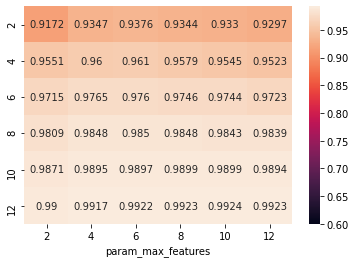

In [133]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".4g", vmin=0.6)

In [134]:
grid.best_params_

{'max_depth': 12, 'max_features': 10, 'n_estimators': 500}

In [135]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
RandomForestClassifier(max_depth=12, max_features=10, n_estimators=500)


In [136]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.6f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.993373


In [137]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.9933605229967272

### Gradient Booster Classifier

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier().fit(X_train, y_train)

In [139]:
gbrt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [140]:
gbrt.score(X_test, y_test)

0.9465528146742568

In [141]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'learning_rate': np.logspace(-2, 2, 5),
              'n_estimators': [5,10,50,100,200,500]}
param_grid

{'learning_rate': array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ]),
 'n_estimators': [5, 10, 50, 100, 200, 500]}

In [142]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(gbrt, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ]),
                         'n_estimators': [5, 10, 50, 100, 200, 500]},
             return_train_score=True, scoring='roc_auc')

In [143]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.340594,0.004055,0.013923,0.005361,0.01,5,"{'learning_rate': 0.01, 'n_estimators': 5}",0.891681,0.889727,0.890022,...,0.893452,0.004056,18,0.893973,0.894525,0.894411,0.891938,0.894205,0.893810,0.000955
1,0.621882,0.009794,0.005504,0.000656,0.01,10,"{'learning_rate': 0.01, 'n_estimators': 10}",0.891591,0.890703,0.890961,...,0.894164,0.004376,17,0.894022,0.895510,0.895349,0.893681,0.894205,0.894553,0.000737
2,2.680247,0.035058,0.012678,0.002832,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",0.935574,0.931839,0.931043,...,0.933500,0.001871,16,0.933099,0.933999,0.934062,0.934360,0.935134,0.934131,0.000655
3,5.226667,0.007311,0.021817,0.002255,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.941744,0.941994,0.941805,...,0.942562,0.001342,13,0.940326,0.943311,0.945069,0.946708,0.943498,0.943782,0.002119
4,10.486790,0.045240,0.035077,0.001889,0.01,200,"{'learning_rate': 0.01, 'n_estimators': 200}",0.955757,0.951519,0.953108,...,0.952992,0.001472,12,0.952879,0.953084,0.954738,0.953705,0.954400,0.953761,0.000722
5,25.906380,0.066398,0.082172,0.006718,0.01,500,"{'learning_rate': 0.01, 'n_estimators': 500}",0.979158,0.974749,0.977738,...,0.976804,0.001558,9,0.976861,0.976736,0.978132,0.977841,0.977552,0.977424,0.000544
6,0.268870,0.010410,0.005863,0.001431,0.1,5,"{'learning_rate': 0.1, 'n_estimators': 5}",0.933699,0.929560,0.932885,...,0.933685,0.002867,15,0.931373,0.931649,0.935093,0.938947,0.935050,0.934422,0.002768
7,0.538977,0.015205,0.005848,0.001840,0.1,10,"{'learning_rate': 0.1, 'n_estimators': 10}",0.943515,0.940735,0.940623,...,0.941410,0.001075,14,0.941630,0.941690,0.943561,0.941996,0.942604,0.942296,0.000721
8,2.581278,0.016059,0.013290,0.001221,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.978001,0.973108,0.976386,...,0.975274,0.001772,11,0.975988,0.975203,0.976733,0.976518,0.975607,0.976010,0.000565
9,5.154849,0.046341,0.019127,0.000366,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.989484,0.986129,0.987457,...,0.987740,0.001083,7,0.988271,0.988082,0.988462,0.988795,0.989115,0.988545,0.000370


In [144]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_learning_rate', columns='param_n_estimators')
pd.set_option("display.precision",6)
res = res.set_index(res.index.values.round(6))
res

param_n_estimators,5,10,50,100,200,500
0.01,0.893452,0.894164,0.933500,0.942562,0.952992,0.976804
0.10,0.933685,0.941410,0.975274,0.987740,0.992979,0.995266
1.00,0.976034,0.986470,0.994462,0.993952,0.992366,0.991916
10.00,0.391769,0.391769,0.391769,0.391769,0.391769,0.391769
100.00,0.293221,0.293221,0.293221,0.293221,0.293221,0.293221


<AxesSubplot:xlabel='param_n_estimators'>

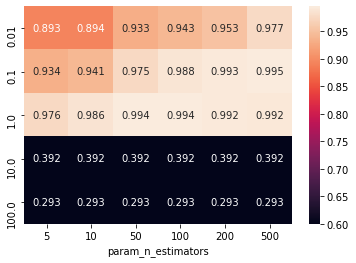

In [145]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

In [146]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [147]:
print("Best estimator:\n{}".format(grid.best_estimator_))
print("Best n_estimators:\n{}".format(grid.best_estimator_.n_estimators))

Best estimator:
GradientBoostingClassifier(n_estimators=500)
Best n_estimators:
500


In [148]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.6f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.996137


In [149]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.996136477120938

### XGBoost

In [150]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("accuracy on training set: %f" % xgb.score(X_train, y_train))
print("accuracy on test set: %f" % xgb.score(X_test, y_test))

[03:37:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

accuracy on training set: 0.994808
accuracy on test set: 0.983660


In [151]:
from sklearn.metrics import roc_auc_score
y_proba_xgb = xgb.fit(X_train, y_train).predict_proba(X_test)

y_score_xgb = xgb.predict_proba(X_test)
roc_auc_score(y_test, y_proba_xgb[:,1])

[03:37:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9973376213752024

### LightGBM

In [152]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print("accuracy on training set: %f" % lgbm.score(X_train, y_train))
print("accuracy on test set: %f" % lgbm.score(X_test, y_test))

LGBMClassifier()

accuracy on training set: 0.984345
accuracy on test set: 0.979970


In [153]:
from sklearn.metrics import roc_auc_score
y_proba_lgbm = lgbm.fit(X_train, y_train).predict_proba(X_test)

y_score_lgbm = lgbm.predict_proba(X_test)
roc_auc_score(y_test, y_proba_lgbm[:,1])

0.9967406721064663

### CatBoost

In [154]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
catb.fit(X_train, y_train)
print("accuracy on training set: %f" % catb.score(X_train, y_train))
print("accuracy on test set: %f" % catb.score(X_test, y_test))

Learning rate set to 0.048665
0:	learn: 0.6387097	total: 12.3ms	remaining: 12.3s
1:	learn: 0.5927517	total: 22.1ms	remaining: 11s
2:	learn: 0.5505104	total: 26.5ms	remaining: 8.79s
3:	learn: 0.5099495	total: 33.1ms	remaining: 8.24s
4:	learn: 0.4744820	total: 38.6ms	remaining: 7.69s
5:	learn: 0.4483315	total: 45.4ms	remaining: 7.53s
6:	learn: 0.4248266	total: 51.5ms	remaining: 7.31s
7:	learn: 0.4031014	total: 58.8ms	remaining: 7.3s
8:	learn: 0.3822076	total: 65.8ms	remaining: 7.25s
9:	learn: 0.3652787	total: 72.4ms	remaining: 7.17s
10:	learn: 0.3509848	total: 78.9ms	remaining: 7.09s
11:	learn: 0.3393951	total: 85.3ms	remaining: 7.02s
12:	learn: 0.3269300	total: 92.2ms	remaining: 7s
13:	learn: 0.3187705	total: 98.5ms	remaining: 6.94s
14:	learn: 0.3082508	total: 105ms	remaining: 6.9s
15:	learn: 0.2946575	total: 111ms	remaining: 6.84s
16:	learn: 0.2866588	total: 118ms	remaining: 6.82s
17:	learn: 0.2793926	total: 124ms	remaining: 6.79s
18:	learn: 0.2721017	total: 131ms	remaining: 6.74s
19:	

191:	learn: 0.0721389	total: 984ms	remaining: 4.14s
192:	learn: 0.0720187	total: 988ms	remaining: 4.13s
193:	learn: 0.0718420	total: 993ms	remaining: 4.13s
194:	learn: 0.0715871	total: 998ms	remaining: 4.12s
195:	learn: 0.0713700	total: 1s	remaining: 4.11s
196:	learn: 0.0712283	total: 1.01s	remaining: 4.1s
197:	learn: 0.0711175	total: 1.01s	remaining: 4.1s
198:	learn: 0.0709090	total: 1.02s	remaining: 4.09s
199:	learn: 0.0707907	total: 1.02s	remaining: 4.08s
200:	learn: 0.0706696	total: 1.03s	remaining: 4.08s
201:	learn: 0.0703739	total: 1.03s	remaining: 4.08s
202:	learn: 0.0703347	total: 1.04s	remaining: 4.07s
203:	learn: 0.0699945	total: 1.04s	remaining: 4.06s
204:	learn: 0.0697279	total: 1.04s	remaining: 4.05s
205:	learn: 0.0693249	total: 1.05s	remaining: 4.05s
206:	learn: 0.0692314	total: 1.05s	remaining: 4.04s
207:	learn: 0.0690750	total: 1.06s	remaining: 4.04s
208:	learn: 0.0688993	total: 1.06s	remaining: 4.03s
209:	learn: 0.0684484	total: 1.07s	remaining: 4.03s
210:	learn: 0.068

382:	learn: 0.0507452	total: 1.98s	remaining: 3.19s
383:	learn: 0.0506999	total: 1.99s	remaining: 3.19s
384:	learn: 0.0506555	total: 1.99s	remaining: 3.18s
385:	learn: 0.0505835	total: 2s	remaining: 3.18s
386:	learn: 0.0505287	total: 2s	remaining: 3.17s
387:	learn: 0.0504735	total: 2.01s	remaining: 3.17s
388:	learn: 0.0504629	total: 2.01s	remaining: 3.16s
389:	learn: 0.0504107	total: 2.02s	remaining: 3.16s
390:	learn: 0.0503261	total: 2.02s	remaining: 3.15s
391:	learn: 0.0502838	total: 2.03s	remaining: 3.14s
392:	learn: 0.0501331	total: 2.03s	remaining: 3.14s
393:	learn: 0.0500077	total: 2.04s	remaining: 3.13s
394:	learn: 0.0499593	total: 2.04s	remaining: 3.13s
395:	learn: 0.0498355	total: 2.05s	remaining: 3.12s
396:	learn: 0.0497492	total: 2.05s	remaining: 3.12s
397:	learn: 0.0496301	total: 2.06s	remaining: 3.11s
398:	learn: 0.0496056	total: 2.06s	remaining: 3.1s
399:	learn: 0.0494911	total: 2.07s	remaining: 3.1s
400:	learn: 0.0492886	total: 2.07s	remaining: 3.09s
401:	learn: 0.049228

544:	learn: 0.0414736	total: 2.78s	remaining: 2.32s
545:	learn: 0.0414586	total: 2.78s	remaining: 2.31s
546:	learn: 0.0414521	total: 2.79s	remaining: 2.31s
547:	learn: 0.0414332	total: 2.79s	remaining: 2.3s
548:	learn: 0.0414058	total: 2.8s	remaining: 2.3s
549:	learn: 0.0413764	total: 2.8s	remaining: 2.29s
550:	learn: 0.0413198	total: 2.81s	remaining: 2.29s
551:	learn: 0.0412697	total: 2.81s	remaining: 2.28s
552:	learn: 0.0411930	total: 2.81s	remaining: 2.28s
553:	learn: 0.0411726	total: 2.82s	remaining: 2.27s
554:	learn: 0.0411070	total: 2.83s	remaining: 2.27s
555:	learn: 0.0410651	total: 2.83s	remaining: 2.26s
556:	learn: 0.0410024	total: 2.84s	remaining: 2.25s
557:	learn: 0.0409549	total: 2.84s	remaining: 2.25s
558:	learn: 0.0409388	total: 2.85s	remaining: 2.24s
559:	learn: 0.0409315	total: 2.85s	remaining: 2.24s
560:	learn: 0.0408949	total: 2.85s	remaining: 2.23s
561:	learn: 0.0408509	total: 2.86s	remaining: 2.23s
562:	learn: 0.0408238	total: 2.87s	remaining: 2.22s
563:	learn: 0.04

706:	learn: 0.0353455	total: 3.58s	remaining: 1.48s
707:	learn: 0.0353381	total: 3.58s	remaining: 1.48s
708:	learn: 0.0353142	total: 3.58s	remaining: 1.47s
709:	learn: 0.0352839	total: 3.59s	remaining: 1.47s
710:	learn: 0.0352578	total: 3.6s	remaining: 1.46s
711:	learn: 0.0352299	total: 3.6s	remaining: 1.46s
712:	learn: 0.0351979	total: 3.6s	remaining: 1.45s
713:	learn: 0.0351715	total: 3.61s	remaining: 1.45s
714:	learn: 0.0351369	total: 3.61s	remaining: 1.44s
715:	learn: 0.0351011	total: 3.62s	remaining: 1.44s
716:	learn: 0.0350672	total: 3.62s	remaining: 1.43s
717:	learn: 0.0350476	total: 3.63s	remaining: 1.43s
718:	learn: 0.0350078	total: 3.63s	remaining: 1.42s
719:	learn: 0.0349704	total: 3.64s	remaining: 1.42s
720:	learn: 0.0349264	total: 3.64s	remaining: 1.41s
721:	learn: 0.0349080	total: 3.65s	remaining: 1.4s
722:	learn: 0.0348593	total: 3.65s	remaining: 1.4s
723:	learn: 0.0348234	total: 3.66s	remaining: 1.39s
724:	learn: 0.0347927	total: 3.66s	remaining: 1.39s
725:	learn: 0.034

869:	learn: 0.0306705	total: 4.38s	remaining: 654ms
870:	learn: 0.0306470	total: 4.38s	remaining: 649ms
871:	learn: 0.0306076	total: 4.38s	remaining: 644ms
872:	learn: 0.0306017	total: 4.39s	remaining: 639ms
873:	learn: 0.0305724	total: 4.39s	remaining: 633ms
874:	learn: 0.0305526	total: 4.4s	remaining: 628ms
875:	learn: 0.0305118	total: 4.4s	remaining: 623ms
876:	learn: 0.0304696	total: 4.41s	remaining: 618ms
877:	learn: 0.0304596	total: 4.41s	remaining: 613ms
878:	learn: 0.0304244	total: 4.42s	remaining: 608ms
879:	learn: 0.0304021	total: 4.42s	remaining: 603ms
880:	learn: 0.0303872	total: 4.43s	remaining: 598ms
881:	learn: 0.0303746	total: 4.43s	remaining: 593ms
882:	learn: 0.0303723	total: 4.44s	remaining: 588ms
883:	learn: 0.0303442	total: 4.44s	remaining: 583ms
884:	learn: 0.0303004	total: 4.45s	remaining: 578ms
885:	learn: 0.0302693	total: 4.45s	remaining: 573ms
886:	learn: 0.0302452	total: 4.46s	remaining: 568ms
887:	learn: 0.0302104	total: 4.46s	remaining: 563ms
888:	learn: 0.

accuracy on training set: 0.993095
accuracy on test set: 0.983976


In [155]:
from sklearn.metrics import roc_auc_score
y_proba_catb = catb.fit(X_train, y_train).predict_proba(X_test)

y_score_catb = catb.predict_proba(X_test)
roc_auc_score(y_test, y_proba_catb[:,1])

Learning rate set to 0.048665
0:	learn: 0.6387097	total: 8.69ms	remaining: 8.69s
1:	learn: 0.5927517	total: 12.8ms	remaining: 6.37s
2:	learn: 0.5505104	total: 16.5ms	remaining: 5.5s
3:	learn: 0.5099495	total: 21ms	remaining: 5.23s
4:	learn: 0.4744820	total: 25ms	remaining: 4.98s
5:	learn: 0.4483315	total: 29.7ms	remaining: 4.92s
6:	learn: 0.4248266	total: 34.4ms	remaining: 4.88s
7:	learn: 0.4031014	total: 38.7ms	remaining: 4.8s
8:	learn: 0.3822076	total: 43.7ms	remaining: 4.81s
9:	learn: 0.3652787	total: 48.9ms	remaining: 4.84s
10:	learn: 0.3509848	total: 54.7ms	remaining: 4.92s
11:	learn: 0.3393951	total: 60.5ms	remaining: 4.99s
12:	learn: 0.3269300	total: 67.4ms	remaining: 5.12s
13:	learn: 0.3187705	total: 74.2ms	remaining: 5.23s
14:	learn: 0.3082508	total: 79.5ms	remaining: 5.22s
15:	learn: 0.2946575	total: 84.4ms	remaining: 5.19s
16:	learn: 0.2866588	total: 89.9ms	remaining: 5.2s
17:	learn: 0.2793926	total: 94.8ms	remaining: 5.17s
18:	learn: 0.2721017	total: 99.5ms	remaining: 5.14s

173:	learn: 0.0765561	total: 911ms	remaining: 4.32s
174:	learn: 0.0762757	total: 918ms	remaining: 4.33s
175:	learn: 0.0758817	total: 924ms	remaining: 4.33s
176:	learn: 0.0754830	total: 932ms	remaining: 4.33s
177:	learn: 0.0753545	total: 936ms	remaining: 4.32s
178:	learn: 0.0750666	total: 941ms	remaining: 4.32s
179:	learn: 0.0747909	total: 945ms	remaining: 4.31s
180:	learn: 0.0747122	total: 950ms	remaining: 4.3s
181:	learn: 0.0744904	total: 954ms	remaining: 4.29s
182:	learn: 0.0743624	total: 958ms	remaining: 4.28s
183:	learn: 0.0739697	total: 963ms	remaining: 4.27s
184:	learn: 0.0737433	total: 968ms	remaining: 4.26s
185:	learn: 0.0736103	total: 972ms	remaining: 4.25s
186:	learn: 0.0734181	total: 978ms	remaining: 4.25s
187:	learn: 0.0733291	total: 984ms	remaining: 4.25s
188:	learn: 0.0730265	total: 989ms	remaining: 4.24s
189:	learn: 0.0725754	total: 994ms	remaining: 4.24s
190:	learn: 0.0723424	total: 1s	remaining: 4.24s
191:	learn: 0.0721389	total: 1s	remaining: 4.23s
192:	learn: 0.07201

341:	learn: 0.0536459	total: 1.77s	remaining: 3.42s
342:	learn: 0.0534467	total: 1.78s	remaining: 3.41s
343:	learn: 0.0532807	total: 1.79s	remaining: 3.4s
344:	learn: 0.0531652	total: 1.79s	remaining: 3.4s
345:	learn: 0.0531406	total: 1.8s	remaining: 3.4s
346:	learn: 0.0530465	total: 1.8s	remaining: 3.39s
347:	learn: 0.0529662	total: 1.81s	remaining: 3.39s
348:	learn: 0.0529369	total: 1.81s	remaining: 3.38s
349:	learn: 0.0527995	total: 1.82s	remaining: 3.38s
350:	learn: 0.0527557	total: 1.82s	remaining: 3.37s
351:	learn: 0.0527135	total: 1.83s	remaining: 3.37s
352:	learn: 0.0526565	total: 1.83s	remaining: 3.36s
353:	learn: 0.0525579	total: 1.84s	remaining: 3.35s
354:	learn: 0.0524738	total: 1.84s	remaining: 3.35s
355:	learn: 0.0524238	total: 1.85s	remaining: 3.34s
356:	learn: 0.0524091	total: 1.85s	remaining: 3.34s
357:	learn: 0.0523918	total: 1.86s	remaining: 3.33s
358:	learn: 0.0522572	total: 1.86s	remaining: 3.33s
359:	learn: 0.0521567	total: 1.87s	remaining: 3.32s
360:	learn: 0.052

520:	learn: 0.0426047	total: 2.7s	remaining: 2.48s
521:	learn: 0.0425586	total: 2.7s	remaining: 2.48s
522:	learn: 0.0425442	total: 2.71s	remaining: 2.47s
523:	learn: 0.0424783	total: 2.71s	remaining: 2.47s
524:	learn: 0.0423968	total: 2.72s	remaining: 2.46s
525:	learn: 0.0423704	total: 2.72s	remaining: 2.45s
526:	learn: 0.0423363	total: 2.73s	remaining: 2.45s
527:	learn: 0.0423280	total: 2.73s	remaining: 2.44s
528:	learn: 0.0423117	total: 2.74s	remaining: 2.44s
529:	learn: 0.0422904	total: 2.74s	remaining: 2.43s
530:	learn: 0.0422722	total: 2.75s	remaining: 2.43s
531:	learn: 0.0422301	total: 2.75s	remaining: 2.42s
532:	learn: 0.0422021	total: 2.76s	remaining: 2.42s
533:	learn: 0.0421895	total: 2.76s	remaining: 2.41s
534:	learn: 0.0420477	total: 2.77s	remaining: 2.4s
535:	learn: 0.0420399	total: 2.77s	remaining: 2.4s
536:	learn: 0.0419676	total: 2.78s	remaining: 2.39s
537:	learn: 0.0418440	total: 2.78s	remaining: 2.39s
538:	learn: 0.0418045	total: 2.79s	remaining: 2.38s
539:	learn: 0.04

684:	learn: 0.0360069	total: 3.5s	remaining: 1.61s
685:	learn: 0.0359965	total: 3.51s	remaining: 1.6s
686:	learn: 0.0359714	total: 3.51s	remaining: 1.6s
687:	learn: 0.0359494	total: 3.52s	remaining: 1.59s
688:	learn: 0.0359471	total: 3.52s	remaining: 1.59s
689:	learn: 0.0359375	total: 3.52s	remaining: 1.58s
690:	learn: 0.0359322	total: 3.53s	remaining: 1.58s
691:	learn: 0.0358351	total: 3.54s	remaining: 1.57s
692:	learn: 0.0358343	total: 3.54s	remaining: 1.57s
693:	learn: 0.0358187	total: 3.54s	remaining: 1.56s
694:	learn: 0.0357871	total: 3.55s	remaining: 1.56s
695:	learn: 0.0357580	total: 3.56s	remaining: 1.55s
696:	learn: 0.0357459	total: 3.56s	remaining: 1.55s
697:	learn: 0.0357134	total: 3.56s	remaining: 1.54s
698:	learn: 0.0356726	total: 3.57s	remaining: 1.54s
699:	learn: 0.0356419	total: 3.58s	remaining: 1.53s
700:	learn: 0.0356010	total: 3.58s	remaining: 1.53s
701:	learn: 0.0355445	total: 3.58s	remaining: 1.52s
702:	learn: 0.0354887	total: 3.59s	remaining: 1.52s
703:	learn: 0.0

847:	learn: 0.0311612	total: 4.3s	remaining: 771ms
848:	learn: 0.0311462	total: 4.3s	remaining: 766ms
849:	learn: 0.0311299	total: 4.31s	remaining: 761ms
850:	learn: 0.0311111	total: 4.31s	remaining: 755ms
851:	learn: 0.0310710	total: 4.32s	remaining: 750ms
852:	learn: 0.0310528	total: 4.32s	remaining: 745ms
853:	learn: 0.0310038	total: 4.33s	remaining: 740ms
854:	learn: 0.0309841	total: 4.33s	remaining: 735ms
855:	learn: 0.0309836	total: 4.34s	remaining: 730ms
856:	learn: 0.0309769	total: 4.34s	remaining: 725ms
857:	learn: 0.0309413	total: 4.35s	remaining: 720ms
858:	learn: 0.0309245	total: 4.35s	remaining: 715ms
859:	learn: 0.0308923	total: 4.36s	remaining: 710ms
860:	learn: 0.0308618	total: 4.37s	remaining: 705ms
861:	learn: 0.0308321	total: 4.37s	remaining: 700ms
862:	learn: 0.0308001	total: 4.38s	remaining: 695ms
863:	learn: 0.0307935	total: 4.38s	remaining: 689ms
864:	learn: 0.0307788	total: 4.38s	remaining: 684ms
865:	learn: 0.0307508	total: 4.39s	remaining: 679ms
866:	learn: 0.

0.9974495076891057

### Best ML Model to Predict Target Variable 'Loyalty' - Results

Random Forest - .9934 <br>
*best params:(max_depth=12, max_features=8, n_estimators=500)<br>*

Gradient Boost Classifier - .9961 <br>
*best params:('learning_rate': 0.1, 'n_estimators': 500)<br>*

XGBoost - 0.9973 <br>
LightGBM - 0.9967<br>
CatBoost - 0.9974 <br>
<br>
**Best Model: CatBoost**

**Why Ensemble Methods?**<br>
Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model. *(towardsdatascience.com)* The use of ensemble methods are very widely used and are very accurate in many applications. Our application is not related to text classification so these models are good candidates for prediction. One drawback is that they are difficult for humans to read but the models are easy to use and are some of the most accurate models. GridSearchCV was used to create and tune various models but the ensemble methods proved to be the most accurate.